In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from matplotlib.patches import Ellipse

In [9]:
# load data from csv file
s_alpha = pd.read_csv('./S(a)_1_pirBN_200eV.csv')
s_energy = pd.read_csv("./Y(E).csv")

# convert data to numpy array
s_alpha_x = s_alpha['x'].to_numpy()
s_alpha_y = s_alpha['y'].to_numpy()
s_energy_x = s_energy['x'].to_numpy()
s_energy_y = s_energy['y'].to_numpy()

# Use scipy to interpolate the data
from scipy.interpolate import interp1d
s_alpha_f = interp1d(s_alpha_x, s_alpha_y, kind='quadratic')
slope_e, intercept_e = np.polyfit(s_energy_x, s_energy_y, 1)
def s_energy_f(x):
    return slope_e * x + intercept_e
points_num = 50
s_alpha_xnew = np.linspace(min(s_alpha_x), max(s_alpha_x), num=points_num)
s_energy_xnew = np.linspace(min(s_energy_x), max(s_energy_x), num=points_num)

# Set the current density data. Later will be loaded from csv file with actual data.

np.random.seed(0)
n = min(len(s_alpha), len(s_energy))
x_start = 0
x_end = 100
j_x_coords = np.linspace(x_start, x_end, n)
j_y_coords = (j_x_coords**2 + np.random.normal(0, 1, n) * 25) * 0.01

j_y_f = interp1d(j_x_coords, j_y_coords, kind='quadratic')
j_x_coords_new = np.linspace(x_start, x_end, points_num)
j_y_coords_new = j_y_f(j_x_coords_new)

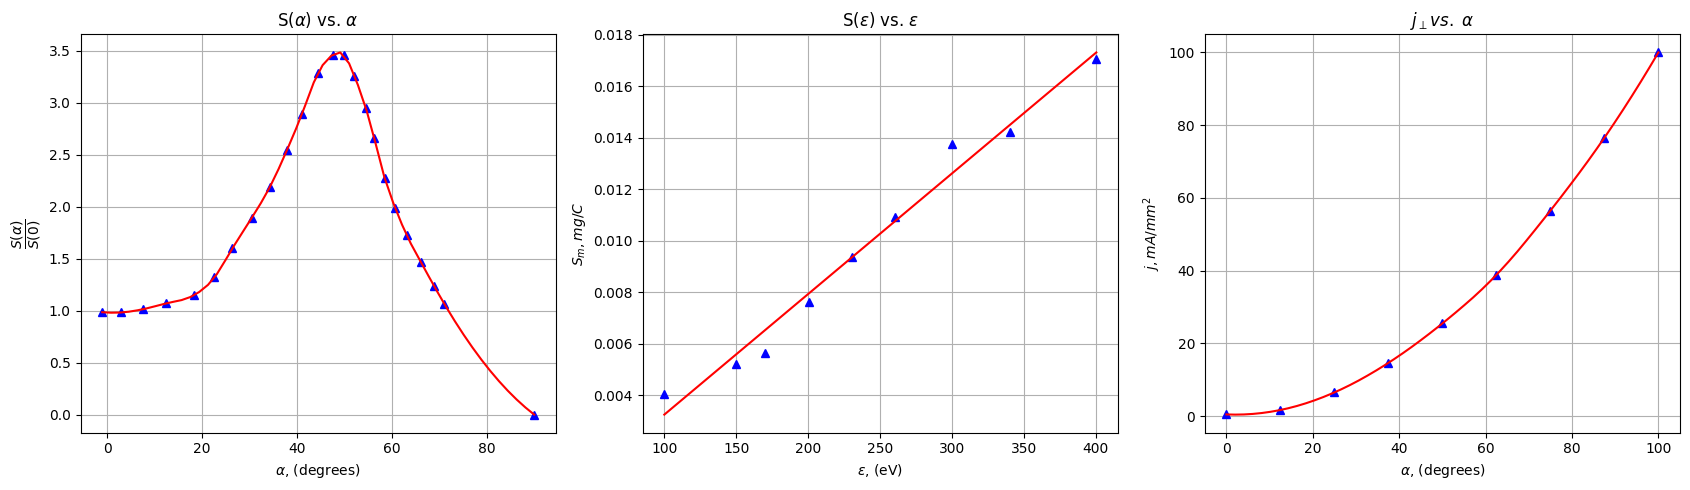

In [10]:
# Add s_alpha and s_energy to one figure. Create subplot
fig, axs = plt.subplots(1, 3, figsize=(17, 5))
axs[0].plot(s_alpha_x, s_alpha_y, marker='^', color='blue', linestyle='None', label=r'S($\alpha$)')
axs[0].plot(s_alpha_xnew, s_alpha_f(s_alpha_xnew), color='red', linestyle='-', label=r'S($\alpha$) RMS')
axs[0].set_title(r'S($\alpha$) vs. $\alpha$')
axs[0].set_xlabel(r'$\alpha$, (degrees)')
axs[0].set_ylabel(r'$\dfrac{S(\alpha)}{S(0)}$')
axs[0].grid(True)

axs[1].plot(s_energy_x, s_energy_y, marker='^', color='blue', linestyle='None', label=r'S($\alpha$)')
axs[1].plot(s_energy_xnew, s_energy_f(s_energy_xnew), color='red', linestyle='-', label=r'S($\alpha$) RMS')
axs[1].set_title(r'S($\epsilon$) vs. $\epsilon$')
axs[1].set_xlabel(r'$\epsilon$, (eV)')
axs[1].set_ylabel(r'$S_m, mg/C$')
axs[1].grid(True)

axs[2].plot(j_x_coords, j_y_coords, marker='^', color='blue', linestyle='None', label=r'Current density')
axs[2].plot(j_x_coords_new, j_y_coords_new, color='red', linestyle='-', label=r'Current density RMS')
axs[2].set_title(r'$j_{\perp} vs.\;\alpha$')
axs[2].set_xlabel(r'$\alpha$, (degrees)')
axs[2].set_ylabel(r'$j, mA/mm^2$')
axs[2].grid(True)

plt.tight_layout()

In [11]:
def alpha_f(x0, y0, x1, y1):
    """
    Function calculates the angle between vector and x axis.
    :param x0: x coordinate of the vector start point (scalar or array)
    :param y0: y coordinate of the vector start point (scalar or array)
    :param x1: x coordinate of the vector end point (scalar or array)
    :param y1: y coordinate of the vector end point (scalar or array)
    """
    if np.isscalar(x0) and np.isscalar(y0) and np.isscalar(x1) and np.isscalar(y1):
        # Scalar inputs, calculate the angle for a single pair of points
        dx = np.abs(x1 - x0)
        dy = np.abs(y1 - y0)
        dx_is_zero = dx == 0
        angle = np.where(dx_is_zero, np.pi/2, np.arctan(dy / dx))
    else:
        # Vectorized inputs, calculate angles for multiple pairs of points
        dx = np.abs(x1 - x0)
        dy = np.abs(y1 - y0)
        dx_is_zero = dx == 0
        angle = np.where(dx_is_zero, np.pi/2, np.arctan(dy / dx))
    return angle

def gamma_f(x, y):
    """
    Function calculates the angle between current two vectors.
    First vector is defined by x[i], y[i] and x-axis.
    Second vector is defined by x[i-1], y[i-1] and x[i], y[i].
    :param x: x coordinates (scalar or array)
    :param y: y coordinates (scalar or array)
    """
    if np.isscalar(x) and np.isscalar(y):
        # Scalar inputs, calculate the angle for a single pair of points
        dx = np.abs(x - x[0])
        dy = np.abs(y - y[0])
        dx_is_zero = dx == 0
        gamma = np.where(dx_is_zero, np.pi/2, np.arctan(dy / dx))
    else:
        # Vectorized inputs, calculate angles for multiple pairs of points
        dx = np.diff(x)
        dy = np.diff(y)
        dx_is_zero = dx == 0
        gamma = np.where(dx_is_zero, np.pi/2, np.arctan(dy / dx))
    return gamma


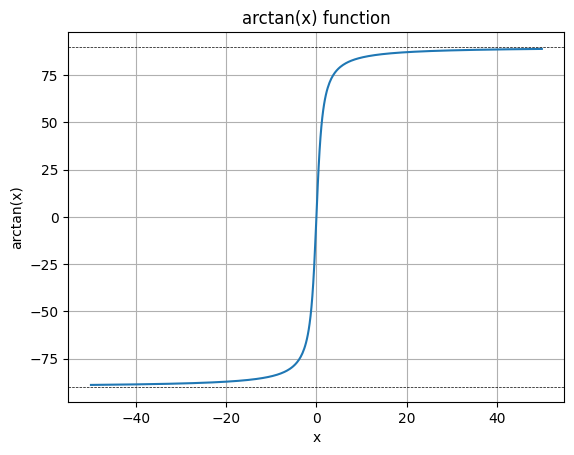

In [12]:
# Plot arctan(x) function
x = np.linspace(-50, 50, 500)
y = np.arctan(x) * 180 / np.pi
plt.plot(x, y)
plt.grid(True)
plt.xlabel('x')
plt.axhline(y=-90, color='k', linestyle='--', linewidth=0.5)
plt.axhline(y=90, color='k', linestyle='--', linewidth=0.5)
plt.ylabel('arctan(x)')
plt.title('arctan(x) function')
plt.show()

In [13]:
# Define your parameters
tau = 100  # seconds
dt = 1  # seconds

# Define ellipse parameters
center_x = 0.5
center_y = 1.0
semimajor_axis = 0.1
semiminor_axis = 0.6

num_points = 1000  # Number of points in the profile
ion_sources = 100  # Number of ion sources

# Generate random source positions within the specified ellipse
theta = np.random.uniform(0, 2 * np.pi, size=ion_sources)
r = np.random.uniform(0, 1, size=ion_sources)
ion_src_x = center_x + semimajor_axis * r * np.cos(theta)
ion_src_y = center_y + semiminor_axis * r * np.sin(theta)

sim_start_x = 0
sim_end_x = 1
profile_x = np.linspace(sim_start_x, sim_end_x, num_points)
profile_y = np.zeros(len(profile_x))

# Precompute constants
ion_energy = 200
s_energy = s_energy_f(ion_energy)

# Create an array to store the erosion profile at different time steps
num_steps = int(tau / dt)
profile_time = np.zeros((num_steps, len(profile_x)))

# Perform the erosion simulation
for step in range(num_steps):
    # Calculate the angle between the current point and all ion sources
    alpha = np.arctan2(ion_src_y[:, np.newaxis] - profile_y, ion_src_x[:, np.newaxis] - profile_x)
    alpha = np.degrees(alpha)

    # Calculate the angle between the current point and the previous point
    dx = profile_x[1:] - profile_x[:-1]
    dy = profile_y[1:] - profile_y[:-1]
    gamma = np.arctan2(dy, dx)
    gamma = np.degrees(gamma)
    # Check alpha. If some of them are greater than 90 degrees, erosion is zero.
    erosion = np.where(alpha > 90, 0, np.abs(s_alpha_f(alpha) * s_energy * j_y_f(profile_x) * np.cos(np.radians(gamma)) * dt))

    # Apply shadowing and set erosion to zero if alpha is greater than 90 degrees
    for i in range(1, len(profile_x)):
        min_y = np.min(profile_y[:i])
        if profile_y[i] <= min_y or alpha[i] > 90:
            erosion[i] = 0
    
    # Apply erosion
    profile_y -= erosion
    profile_time[step] = profile_y

print(ion_src_x.shape, ion_src_y.shape, profile_x.shape, profile_y.shape)

ValueError: A value (90.07147295609096) in x_new is above the interpolation range's maximum value (90.0).

ValueError: x and y must be the same size

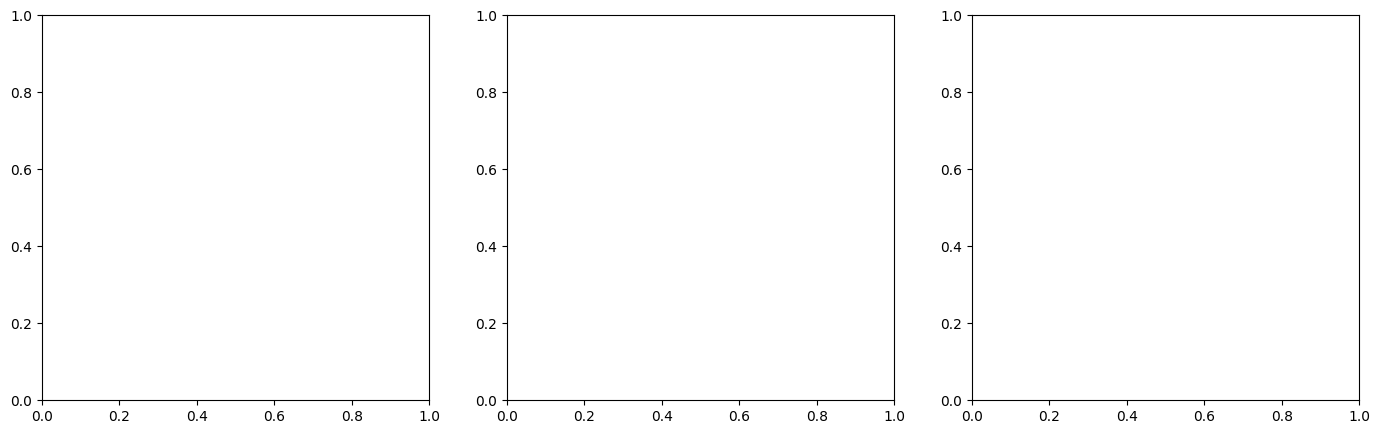

In [ ]:
# Plot alpha vs. x
fig, axs = plt.subplots(1, 3, figsize=(17, 5))
axs[0].scatter(profile_x, alpha, color='blue', linestyle='-', label=r'$\alpha$', s=2)
axs[0].axvline(ion_src_x, color='red', linestyle='--', linewidth=1)
axs[0].set_title(r'$\alpha$ vs. x')
axs[0].set_xlabel(r'$x, mm$')
axs[0].set_ylabel(r'$\alpha, degrees$')
axs[0].grid(True)

axs[1].plot(profile_x, profile_y, color='blue', linestyle='-', label=r'$y$')
axs[1].axvline(ion_src_x, color='red', linestyle='--', linewidth=1)
axs[1].set_title(r'Profile erosion vs. x')
axs[1].set_xlabel(r'$x, mm$')
axs[1].set_ylabel(r'$y, mm$')
axs[1].grid(True)

axs[2].plot(profile_x, gamma, color='blue', linestyle='-', label=r'$\gamma$', linewidth=0.8)
axs[2].axvline(ion_src_x, color='red', linestyle='--', linewidth=1)
axs[2].set_title(r'$\gamma$ vs. x')
axs[2].set_xlabel(r'$x, mm$')
axs[2].set_ylabel(r'$\gamma, degrees$')
axs[2].grid(True)


In [ ]:
# Plot erosion profile at the last time step
plt.figure(figsize=(10, 6))
plt.plot(profile_x, profile_time[-1, :], color='black', linestyle='-', label=f'Erosion after {tau:.1e} cylces', linewidth=1, alpha=1)
# Add initial profile
plt.axhline(y=0, color='black', linestyle='--', label='Initial profile')
plt.axvline(ion_src_x, color='green', linestyle='--', label='Ion source x coordinate', linewidth=1)
# Plot the ellipse
plt.scatter(ion_src_x, ion_src_y, marker='o', color='red', linestyle='None', label=f'Ion sources {ion_sources:.1e}', s=8, alpha=1)
plt.title(r'Erosion profile at the last time step')
plt.xlabel(r'$x$, (mm)')
plt.ylabel(r'$y$, (mm)')
plt.legend()
# Define ellipse parameters for the boundaries
boundary_ellipse = Ellipse(
    (center_x, center_y),
    width=2 * semimajor_axis,
    height=2 * semiminor_axis,
    edgecolor='blue',
    facecolor='none',
    linewidth=1,
    linestyle='--',
    alpha=1,
)
plt.gca().add_patch(boundary_ellipse)
plt.grid(True, alpha=0.25)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
for step in range(num_steps):
    trsp = step / num_steps  # Calculate alpha for transparency
    plt.plot(profile_x, profile_time[step, :], label=f'Time Step {step}', alpha=trsp, color='black', linewidth=0.25)
    #plt.scatter(profile_x, profile_time[step, :], alpha=alpha, color='black', s=5)
plt.title('Erosion Profile at Different Time Steps')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
step = int(num_steps * 1) - 1
plt.plot(profile_x, profile_time[step, :], label=f'Time Step {step}', alpha=1, color='black', linewidth=2)
#plt.scatter(profile_x, profile_time[step, :], alpha=alpha, color='black', s=5)
plt.title('Erosion Profile at Different Time Steps')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-0.025, 1.025)
plt.ylim(min(profile_time[-1, :])*1.025, 0.1)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
from contourLoader import ContourLoader as cl
import ezdxf
path = ".\ht_Contour\ceramics.dxf"
contour = cl(path)
spt_100_contour = contour.load_contour_data()
plt.plot(spt_100_contour[:,0],spt_100_contour[:,1],\
            color='black', linewidth=1, linestyle='-')
plt.grid()
plt.axis('equal')
plt.show()